In [ ]:
import sys
sys.path.insert(0, '../')
import random
from dasQt import das
import numpy as np
import pathlib
import matplotlib.pyplot as plt

das1 = das.DAS()

# read the data
das1.scale = 100
path_dir = pathlib.Path('/Volumes/CSIM_LAB/DATA/nanhu-2024-02-01')
files = list(path_dir.glob('*.h5'))

# das1.scale = 0.01
# path_dir = pathlib.Path('/Volumes/CSIM_LAB/DATA/Car-JLU-2024-01-31/ovlink/2024-02-01')
# files = list(path_dir.glob('*.dat'))


files = sorted(files)[50:]

In [ ]:
file = random.choice(files)
das1.readData(file)
das1.cutData(170, 330)
# das1.RawDataBpFilter(1, 2, 8, 9)    # nothing
# das1.RawDataBpFilter(10, 11, 40, 43)    # nothing
# das1.RawDataBpFilter(0.1, 0.15, 2, 2.5)   # noise


In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(12, 3))
das1.imshowDataAll(ax)
plt.show()

In [10]:
0.001 * np.max(Sxx)

3031.4590000000003

In [16]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import spectrogram

def plotSpectrogram(t, data, frequencies, times, Sxx, i):
    with plt.style.context('ggplot'):
        fig, (ax1, ax3) = plt.subplots(2, 1, figsize=(16, 6), sharex=True)

        ax1.plot(t, data)
        ax1.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))
        # ax1.set_ylim(-1e3, 1e3)
        # ax1.set_ylim(-3e-1, 3e-1)
        ax1.set_title(f'{i*2:.1f} (m)')
        # ax1.set_xlabel('Time (s)')
        ax1.set_ylabel('Amplitude')

        ax3.imshow(Sxx, cmap='jet', aspect='auto',
                    extent=[times[0], times[-1], frequencies[0], frequencies[-1]], 
                    origin='lower',interpolation='bilinear',
                    vmin=0, vmax=1e-6)
        # ax3.imshow(10 * np.log10(Sxx), cmap='jet', aspect='auto',
        #             extent=[times[0], times[-1], frequencies[0], frequencies[-1]], 
        #             origin='lower',interpolation='bilinear',
        #             vmin=-80, vmax=0)
        # ax3.set_title('Spectrogram')
        ax3.grid(False)
        ax3.set_xlabel('Time (s)')
        ax3.set_ylabel('Frequency (Hz)')
        # ax3.set_xticklabels([(i+8 * 3600).strftime('%H:%M') for i in times_utc], rotation=315)

        plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0)
        ax1.xaxis.label.set_visible(False)
        # ax1.set_position([0.125, 0.35, 0.775, 0.6])  # [left, bottom, width, height]
        # ax3.set_position([0.125, 0.1, 0.775, 0.25])  # Adjust 'bottom' to move it upwards

        # Optionally, reduce font size of the y-tick labels
        for label in ax1.get_yticklabels():
            label.set_fontsize(8)
        for label in ax3.get_yticklabels():
            label.set_fontsize(8)

        plt.savefig(f'./figXiMen/{i*2:.1f}.png', dpi=300, bbox_inches='tight')
        plt.close()
        # plt.show()

In [12]:
df

2000.0

In [21]:
tr.stats

         network: XX
         station: XX
        location: XX
         channel: Z
       starttime: 2024-02-01T07:24:55.000000Z
         endtime: 2024-02-01T09:41:18.999500Z
   sampling_rate: 2000.0
           delta: 0.0005
            npts: 16368000
           calib: 1.0
         _format: MSEED
           mseed: AttribDict({'dataquality': 'D', 'number_of_records': 16206, 'encoding': 'FLOAT32', 'byteorder': '>', 'record_length': 4096, 'filesize': 66379776})

In [27]:
from scipy import signal
import obspy
from scipy import fft
import matplotlib.pyplot as plt
import numpy as np
import pathlib


Fmax = 250
# trace = 250
# dt = das1.dt
# t, data, xf, yf = das1.signalTrace(trace)


# path_dir_new1 = pathlib.Path('/Volumes/CSIM_LAB/DATA/nanhu-2024-02-01-mseed-all')
path_dir_new1 = pathlib.Path('/Volumes/CSIM_LAB/DATA/Car-JLU-2024-01-31/ovlink/new_2024-02-01-all')
for file in sorted(path_dir_new1.glob('*.mseed')):
    # file = path_dir_new1 / '070.mseed'
    d = obspy.read(file)
    tr = d[0]
    df = tr.stats.sampling_rate
    dt = 1/df

    data = tr.data[int(2000//dt): int(2500//dt)]
    t = np.arange(0, len(data)/df, 1/df)


    # delta = dt
    # npts = len(data) 
    # t = delta * np.arange(npts)
    # xf = fft.fftfreq(npts, delta)
    # yf = fft.fft(data)

    # xf = np.abs(xf)
    # yf = np.abs(yf)

    i = 1
    frequencies, times, Sxx = signal.spectrogram(data, fs=1/dt, 
                                                nperseg=1024*i,      # length of each segment
                                                noverlap=512*i,      # overlap between segments
                                                nfft=1024*i)

    index = np.abs(frequencies - Fmax).argmin()
    Sxx = Sxx[:index, :]
    frequencies = frequencies[:index]
    name = int(file.name.split('.')[0])
    plotSpectrogram(t, data, frequencies, times, Sxx, name)



In [ ]:
t_index_start = np.abs(times - 9000*dt).argmin()
t_index_end = np.abs(times - 10000*dt).argmin()

In [ ]:

times_utc = tr.times("utcdatetime")
times_utc = times_utc[::10000]

In [ ]:
with plt.style.context('ggplot'):
    fig, (ax1, ax3) = plt.subplots(2, 1, figsize=(16, 6), sharex=True)

    ax1.plot(t, data)
    ax1.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))
    # ax1.set_ylim(-1e3, 1e3)
    # ax1.set_ylim(-3e-1, 3e-1)
    ax1.set_title(f'{50*4.8} (m)')
    # ax1.set_xlabel('Time (s)')
    ax1.set_ylabel('Amplitude')


    index = np.abs(frequencies - Fmax).argmin()
    # ax3.pcolor(times, frequencies[:index], 10 * np.log10(Sxx[:index, :]), cmap='jet')
    ax3.imshow(Sxx[:index, :], cmap='jet', aspect='auto',
                extent=[times[0], times[-1], frequencies[0], frequencies[index]], 
                origin='lower',interpolation='bilinear',
                vmin=0, vmax=0.001 * np.max(Sxx))
    # ax3.set_title('Spectrogram')
    ax3.grid(False)
    ax3.set_xlabel('Time (s)')
    ax3.set_ylabel('Frequency (Hz)')
    ax3.set_xticklabels([(i+8 * 3600).strftime('%H:%M') for i in times_utc], rotation=315)

    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0)
    ax1.xaxis.label.set_visible(False)
    # ax1.set_position([0.125, 0.35, 0.775, 0.6])  # [left, bottom, width, height]
    # ax3.set_position([0.125, 0.1, 0.775, 0.25])  # Adjust 'bottom' to move it upwards

    # Optionally, reduce font size of the y-tick labels
    for label in ax1.get_yticklabels():
        label.set_fontsize(8)
    for label in ax3.get_yticklabels():
        label.set_fontsize(8)

    plt.savefig('spectrogram.png', dpi=300, bbox_inches='tight')
    plt.show()

In [ ]:
a = tr.times("utcdatetime")

In [ ]:
with plt.style.context('ggplot'):
    fig, ax2 = plt.subplots(1, 1, figsize=(10, 6))
    # index = np.where(xf < 50)
    index = np.abs(xf - Fmax).argmin()
    ax2.plot(xf[:index], yf[:index], color='g')
    # ax2.set_ylim(0, np.max(yf))
    ax2.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))
    ax2.set_title('Frequency domain')
    ax2.set_xlabel('Frequency (Hz)')
    ax2.set_ylabel('Amplitude')
    plt.show()

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(12, 3))
das1.imshowDataAll(ax)
plt.show()

In [ ]:
d.plot()

In [1]:

from scipy import signal
import obspy
from scipy import fft
import matplotlib.pyplot as plt
import numpy as np
import pathlib


Fmax = 250
# trace = 250
# dt = das1.dt
# t, data, xf, yf = das1.signalTrace(trace)


# path_dir_new1 = pathlib.Path('/Volumes/CSIM_LAB/DATA/nanhu-2024-02-01-mseed-all')
path_dir_new1 = pathlib.Path('/Volumes/CSIM_LAB/DATA/Car-JLU-2024-01-31/ovlink/new_2024-02-01-all')
# for file in sorted(path_dir_new1.glob('*.mseed')):
file = path_dir_new1 / '070.mseed'
d = obspy.read(file)
tr = d[0]
df = tr.stats.sampling_rate
dt = 1/df

data = tr.data[int(2000//dt):] # int(2500//dt)
t = np.arange(0, len(data)/df, 1/df)

tr.data = data



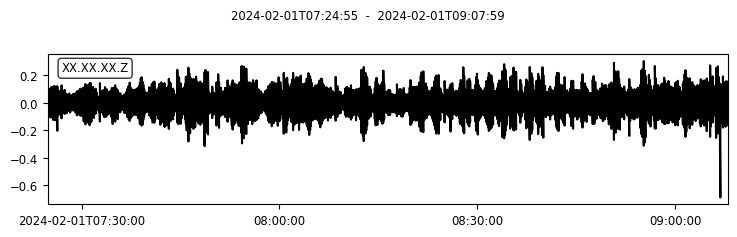

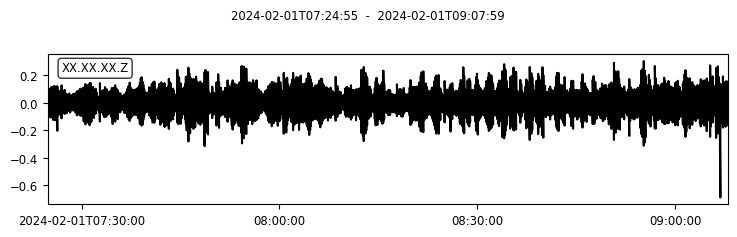

In [12]:
tr.plot()

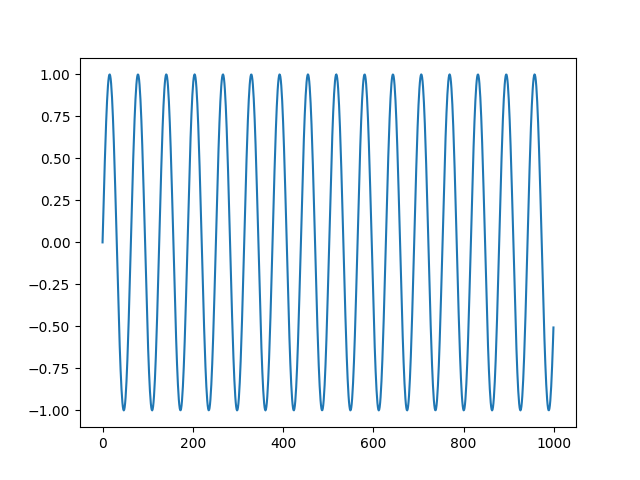

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib ipympl
plt.rcParams['font.family'] = 'Times New Roman' 
plt.rcParams['font.sans-serif']= 'Times New Roman'
plt.rcParams['font.sans-serif'] = 'SimSun' # 用来正常显示中文
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号


plt.plot(np.sin(np.linspace(0, 100, 1000)))

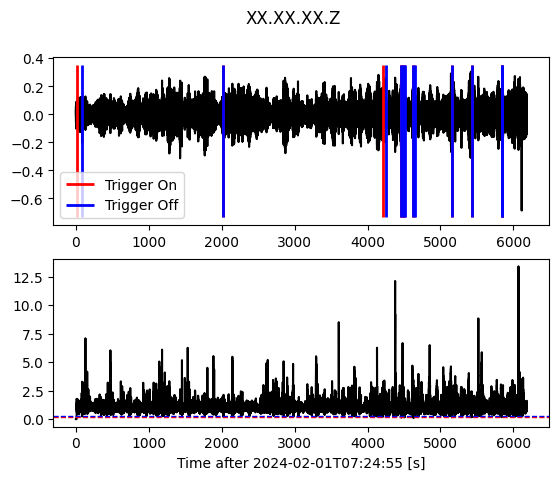

In [2]:
## Delayed Sta Lta

from obspy.signal.trigger import delayed_sta_lta, plot_trigger, classic_sta_lta

cft = classic_sta_lta(tr.data, int(0.2 * df), int(10 * df))
# cft = delayed_sta_lta(tr.data, int(0.2 * df), int(300 * df))
plot_trigger(tr, cft, 0.2, 0.3)